In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [5]:
import env

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/iris_db'
query = '''
SELECT * FROM measurements JOIN species USING(species_id);
'''

iris = pd.read_sql(query, url)

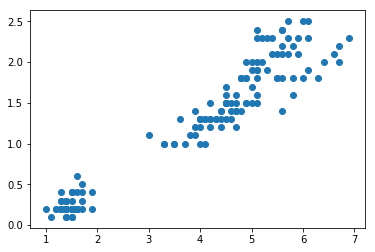

In [6]:
X = iris[['petal_length', 'petal_width']]

plt.scatter(X.petal_length, X.petal_width)

In [13]:
starting_points = [(3, 1), (1, 2), (6, 1)]

centers = pd.DataFrame(starting_points, columns=['petal_length', 'petal_width'])
centers

,petal_length,petal_width
0,3,1
1,1,2
2,6,1


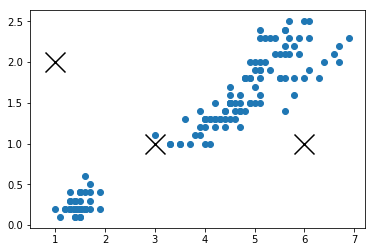

In [11]:
plt.scatter(X.petal_length, X.petal_width)
plt.scatter(centers.petal_length, centers.petal_width, marker='x', s=400, c='black')

In [18]:
def distance(x, y):
    '''distance between x and y'''
    return math.sqrt((x.petal_length - y.petal_length)**2 +
                     (x.petal_width - y.petal_width)**2)
    
def find_cluster(row: pd.Series):
    '''takes a data point, and returns the nearest center'''
    distances = centers.apply(lambda center: distance(center, row), axis=1)
    return distances.idxmin()

In [23]:
X['cluster'] = X.apply(find_cluster, axis=1)
X.head()

,petal_length,petal_width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,1
3,1.5,0.2,0
4,1.4,0.2,0


In [26]:
X.cluster.value_counts()

0    76
2    63
1    11
Name: cluster, dtype: int64

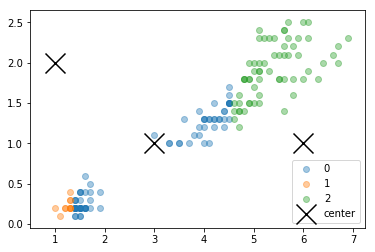

In [30]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

In [32]:
centers = X.groupby('cluster').mean()

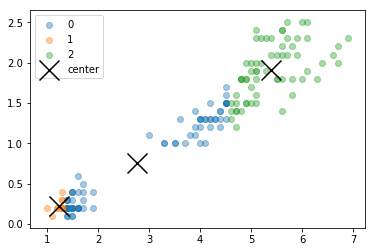

In [33]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

In [35]:
X['cluster'] = X.apply(find_cluster, axis=1)

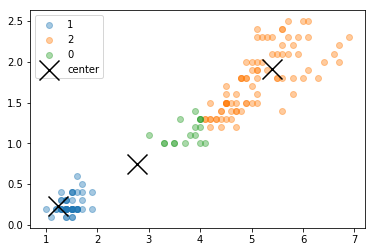

In [36]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

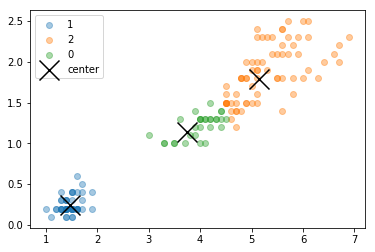

In [37]:
centers = X.groupby('cluster').mean()
X['cluster'] = X.apply(find_cluster, axis=1)

for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

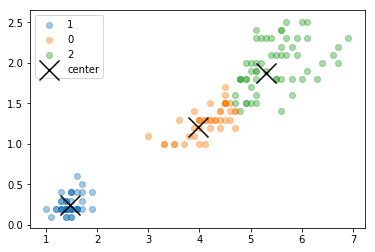

In [38]:
centers = X.groupby('cluster').mean()
X['cluster'] = X.apply(find_cluster, axis=1)

for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

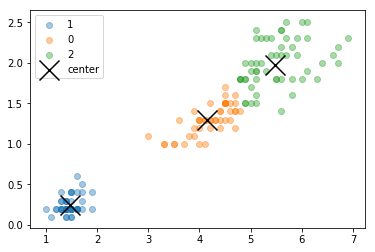

In [39]:
centers = X.groupby('cluster').mean()
X['cluster'] = X.apply(find_cluster, axis=1)

for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

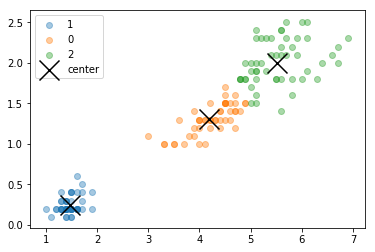

In [40]:
centers = X.groupby('cluster').mean()
X['cluster'] = X.apply(find_cluster, axis=1)

for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

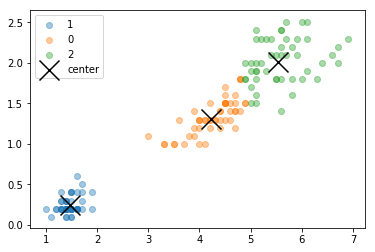

In [41]:
centers = X.groupby('cluster').mean()
X['cluster'] = X.apply(find_cluster, axis=1)

for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)

plt.scatter(centers.petal_length, centers.petal_width, s=400, marker='x', c='black', label='center')
plt.legend()

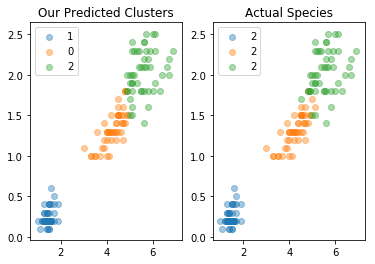

In [45]:
plt.subplot(121)
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)
plt.title('Our Predicted Clusters')
plt.legend()

plt.subplot(122)
for species in iris.species_name.unique():
    this_cluster = iris[iris.species_name == species]
    plt.scatter(this_cluster.petal_length, this_cluster.petal_width, label=cluster, alpha=.4)
plt.title('Actual Species')
plt.legend()

In [46]:
from sklearn.cluster import KMeans

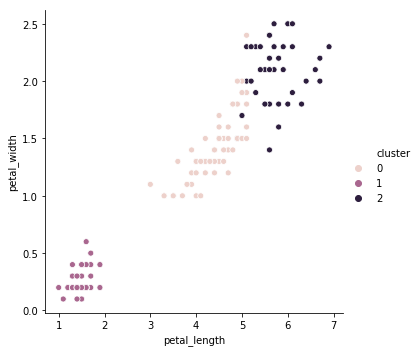

In [54]:
X = iris[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='petal_length', y='petal_width', hue='cluster')

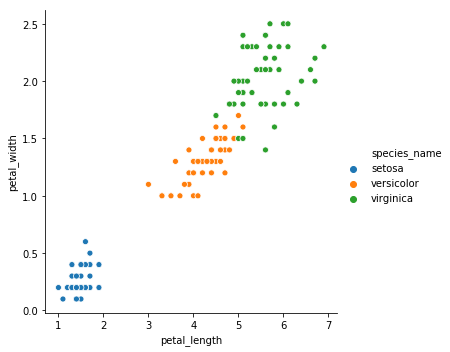

In [55]:
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species_name')

In [60]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.drop(columns='cluster').columns)

,petal_length,petal_width,sepal_length,sepal_width
0,4.393548,1.433871,5.901613,2.748387
1,1.462000,0.246000,5.006000,3.428000
2,5.742105,2.071053,6.850000,3.073684


In [63]:
kmeans.inertia_

78.85144142614601

In [70]:
X.head()

,petal_length,petal_width,sepal_length,sepal_width,cluster
0,1.4,0.2,5.1,3.5,cluster_0
1,1.4,0.2,4.9,3.0,cluster_0
2,1.3,0.2,4.7,3.2,cluster_0
3,1.5,0.2,4.6,3.1,cluster_0
4,1.4,0.2,5.0,3.6,cluster_0


681.3706

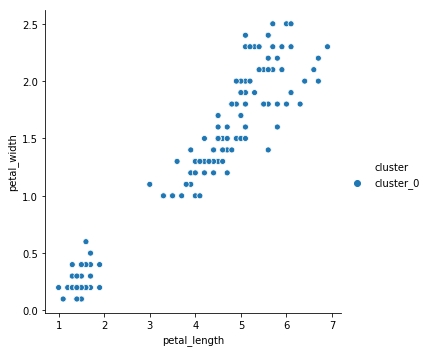

In [79]:
# X.drop(columns='cluster', inplace=True)

kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

X.cluster = 'cluster_' + X.cluster.astype('str')

sns.relplot(data=X, x='petal_length', y='petal_width', hue='cluster')
kmeans.inertia_

In [89]:
X = iris[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

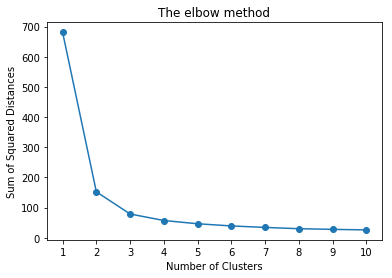

In [92]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

In [95]:
from mpl_toolkits.mplot3d import Axes3D

In [96]:
estimators = [('8 Clusters', KMeans(n_clusters=8)),
              ('3 Clusters', KMeans(n_clusters=3)),
              ('3 Clusters, bad hyperparam', KMeans(n_clusters=3, n_init=1, max_iter=1, init='random'))]

<IPython.core.display.Javascript object>


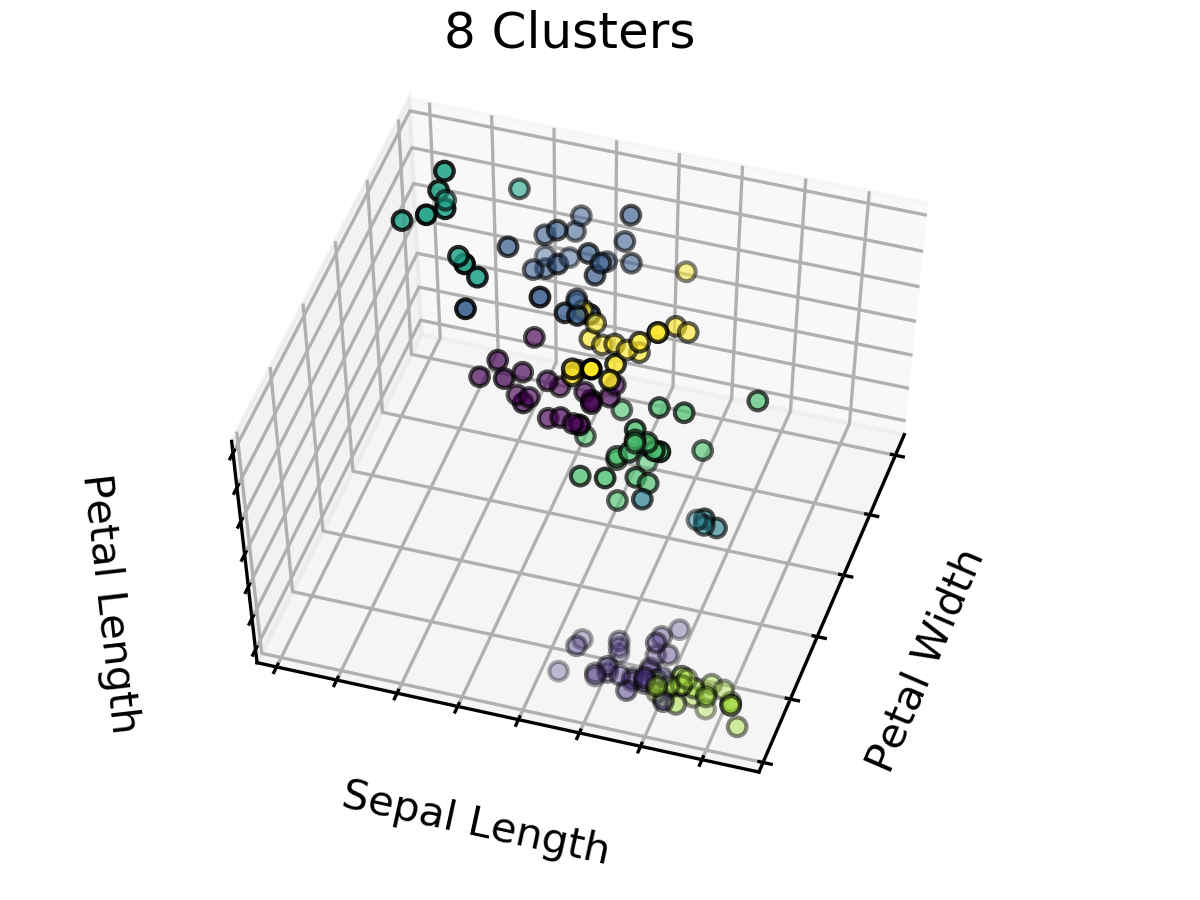

<IPython.core.display.Javascript object>


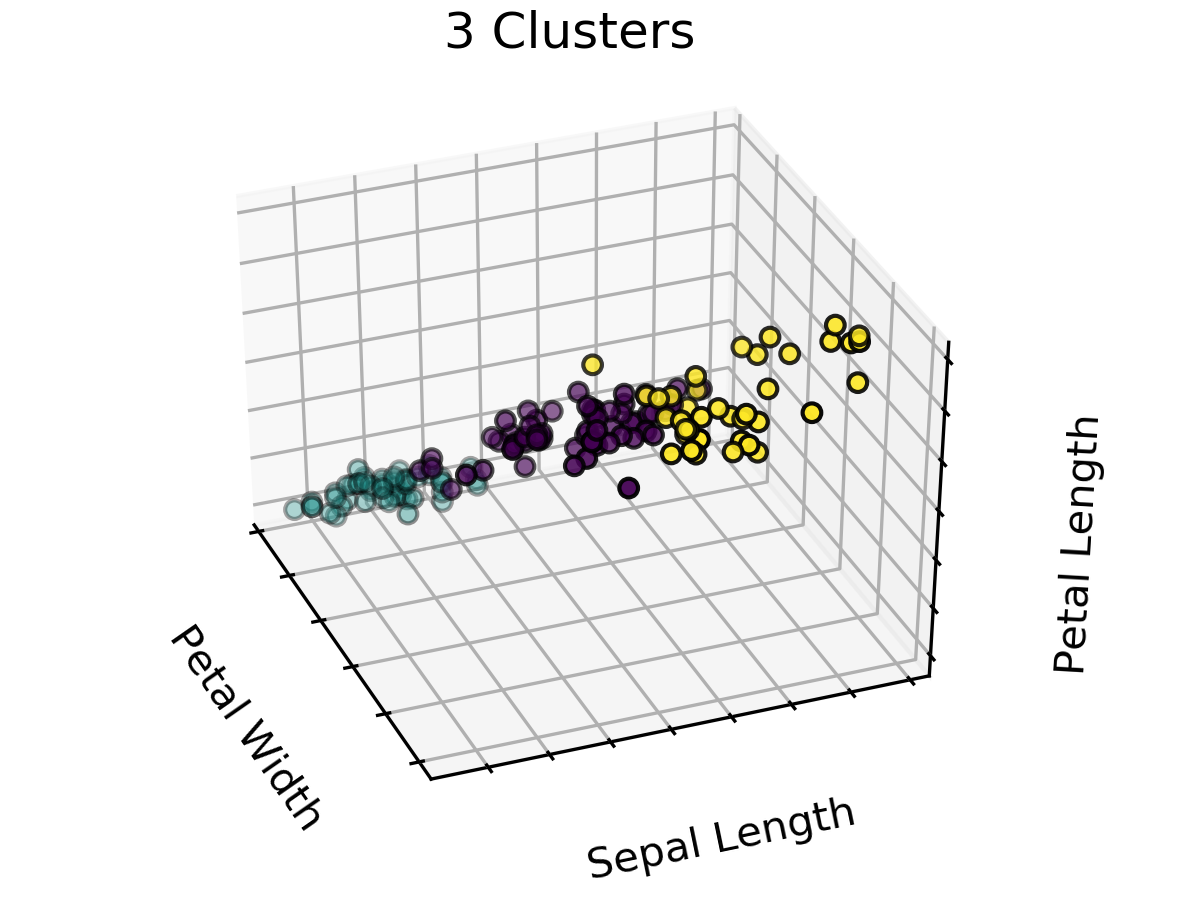

<IPython.core.display.Javascript object>


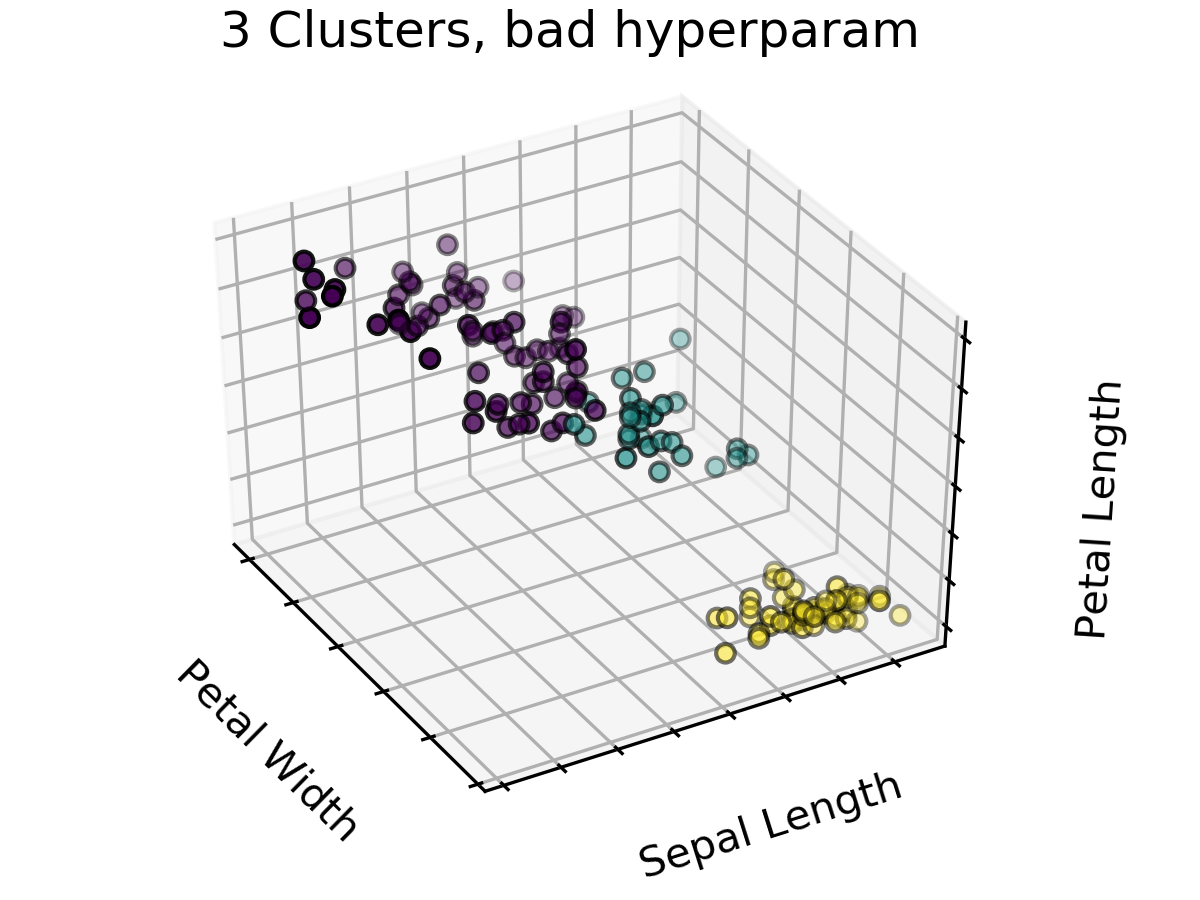

In [100]:
%matplotlib notebook

for i, (title, kmeans) in enumerate(estimators):
    # fit the model
    kmeans.fit(X)

    labels = kmeans.labels_

    # setup the 3d plot
    fignum = i + 1
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # plot the points
    ax.scatter(X.petal_width, X.sepal_length, X.petal_length,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Length')
    ax.set_zlabel('Petal Length')

    ax.set_title(title)
    ax.dist = 12